In [1]:
%matplotlib inline

# 時系列分析II―ARMAモデル（自己回帰移動平均モデル）の評価と将来予測
---
AICやBICも含む
http://www.atmarkit.co.jp/ait/articles/1409/01/news006.html

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('report.csv', skiprows=5, header=None, nrows=550)
df[0:5]

,0,1
0,2004-01-04 - 2004-01-10,5
1,2004-01-11 - 2004-01-17,4
2,2004-01-18 - 2004-01-24,5
3,2004-01-25 - 2004-01-31,4
4,2004-02-01 - 2004-02-07,4


In [4]:
df.index = pd.date_range('2004-01-04', periods=550, freq='W')
df[0:5]

,0,1
2004-01-04,2004-01-04 - 2004-01-10,5
2004-01-11,2004-01-11 - 2004-01-17,4
2004-01-18,2004-01-18 - 2004-01-24,5
2004-01-25,2004-01-25 - 2004-01-31,4
2004-02-01,2004-02-01 - 2004-02-07,4


In [5]:
del df[0]
df[0:5]

,1
2004-01-04,5
2004-01-11,4
2004-01-18,5
2004-01-25,4
2004-02-01,4


In [6]:
df = df.rename_axis(mapper={1:'num'}, axis=1)
df[0:5]

,num
2004-01-04,5
2004-01-11,4
2004-01-18,5
2004-01-25,4
2004-02-01,4


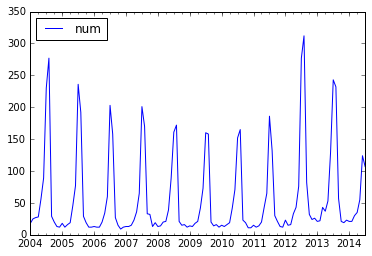

In [7]:
dfm = df.resample('M', how=sum)
dfm.plot()

In [8]:
dfms = dfm[dfm.index <= '2013-12-31']
dfms["num"] = dfms["num"].astype(np.float64)

/Users/labmember/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


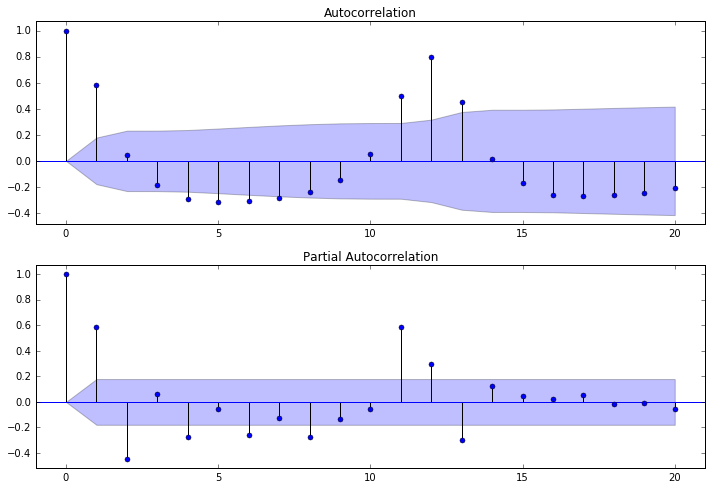

In [9]:
# 自己相関のプロット
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfms['num'], lags=20, ax=ax1)
# 偏自己相関のプロット
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfms['num'], lags=20, ax=ax2)

In [10]:
# ARMA(自己回帰移動平均モデル)
arma_mod1100 = sm.tsa.ARMA(dfms, (11,0)).fit()
arma_mod1200 = sm.tsa.ARMA(dfms, (12,0)).fit()
arma_mod1300 = sm.tsa.ARMA(dfms, (13,0)).fit()
arma_mod1101 = sm.tsa.ARMA(dfms, (11,1)).fit()
arma_mod1201 = sm.tsa.ARMA(dfms, (12,1)).fit()
arma_mod1301 = sm.tsa.ARMA(dfms, (13,1)).fit()

/Users/labmember/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/labmember/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/labmember/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/labmember/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/labmember/.pyenv/versions/ana

In [11]:
# 情報量基準の確認
print(arma_mod1100.aic, arma_mod1100.bic)
print(arma_mod1200.aic, arma_mod1200.bic)
print(arma_mod1300.aic, arma_mod1300.bic)
print(arma_mod1101.aic, arma_mod1101.bic)
print(arma_mod1201.aic, arma_mod1201.bic)
print(arma_mod1301.aic, arma_mod1301.bic)

1189.9537048411391 1226.1910975
1145.414837827991 1184.43972223
1136.1994149037778 1178.01179105
1170.3633418167014 1209.38822622
1138.9929354201363 1180.80531156
1137.784817414528 1182.3846853


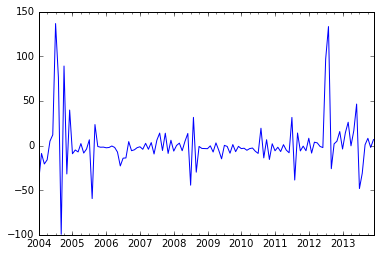

In [12]:
# 残差の算出とグラフ
resid = arma_mod1300.resid
resid.plot()

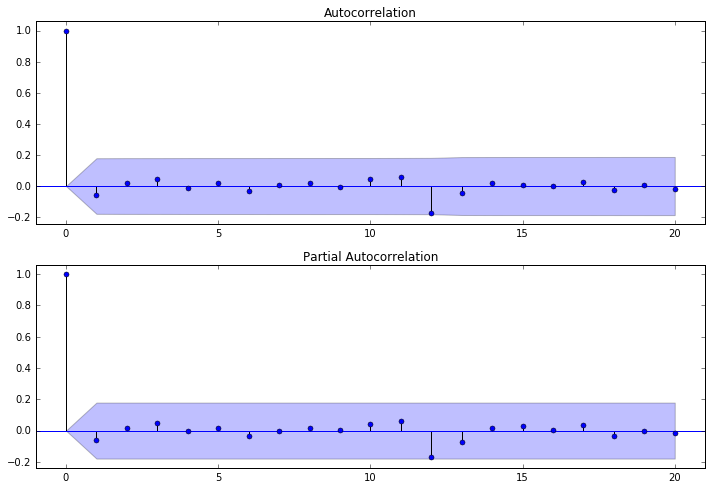

In [13]:
# 残差の自己相関をplot
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20, ax=ax1)
# 残差の偏自己相関のplot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=20, ax=ax2)


In [14]:
# 残差の正規分布をテスト
stats.normaltest(resid)

NormaltestResult(statistic=72.467062696602895, pvalue=1.8364422490906896e-16)

In [15]:
# Ljung-Box検定
r,q,p = sm.tsa.acf(resid.values.squeeze(), nlags=13, qstat=True)
data = np.c_[range(1,14), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC         Q  Prob(>Q)
lag                              
1   -0.058687  0.423721  0.515086
2    0.018192  0.464783  0.792636
3    0.045774  0.726964  0.866844
4   -0.010861  0.741852  0.946069
5    0.019676  0.791137  0.977595
6   -0.032027  0.922863  0.988368
7    0.003691  0.924628  0.995955
8    0.017949  0.966741  0.998450
9   -0.003615  0.968465  0.999507
10   0.043663  1.222200  0.999572
11   0.055087  1.629784  0.999431
12  -0.172494  5.663137  0.932102
13  -0.043258  5.919165  0.949045


/Users/labmember/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


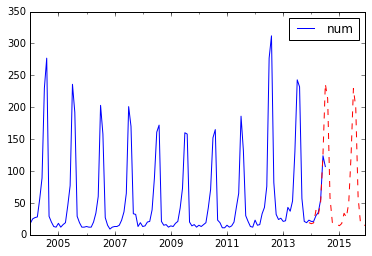

2013-12-31     19.031520
2014-01-31     17.423636
2014-02-28     18.746091
2014-03-31     38.294335
2014-04-30     30.809397
2014-05-31     51.618235
2014-06-30    126.213944
2014-07-31    236.696773
2014-08-31    213.606605
2014-09-30     58.405035
2014-10-31     19.258039
2014-11-30     17.460241
2014-12-31     16.247872
2015-01-31     14.211415
2015-02-28     17.688335
2015-03-31     33.717023
2015-04-30     27.371986
2015-05-31     50.055357
2015-06-30    124.920485
2015-07-31    229.538754
2015-08-31    199.071407
2015-09-30     59.370910
2015-10-31     19.094899
2015-11-30     16.499673
2015-12-31     14.649349
Freq: M, dtype: float64

In [16]:
# 予測
dfm.plot()
arma_mod1201.predict(119, 143, dynamic=True).plot(style='r--')
plt.show()
arma_mod1201.predict(119, 143, dynamic=True)